In [1]:
import getfem as gf
import numpy as np

In [2]:
X = np.array([0.0, 1.0])
mesh = gf.Mesh("cartesian", X)
print(mesh)


BEGIN POINTS LIST

  POINT COUNT 2
  POINT  0  0
  POINT  1  1

END POINTS LIST



BEGIN MESH STRUCTURE DESCRIPTION

  CONVEX COUNT 1
  CONVEX 0    'GT_PK(1,1)'      0  1

END MESH STRUCTURE DESCRIPTION



In [3]:
fb1 = mesh.outer_faces_with_direction([-1.0], 0.01)
print(fb1)

[[0]
 [1]]


In [4]:
fb2 = mesh.outer_faces_with_direction([1.0], 0.01)
print(fb2)

[[0]
 [0]]


In [5]:
print(mesh.outer_faces_in_box([-1.0], [1.0]))

[[0 0]
 [0 1]]


In [6]:
LEFT = 1
RIGHT = 2
mesh.set_region(LEFT, fb1)
mesh.set_region(RIGHT, fb2)
print(mesh)


BEGIN POINTS LIST

  POINT COUNT 2
  POINT  0  0
  POINT  1  1

END POINTS LIST



BEGIN MESH STRUCTURE DESCRIPTION

  CONVEX COUNT 1
  CONVEX 0    'GT_PK(1,1)'      0  1

END MESH STRUCTURE DESCRIPTION
BEGIN REGION 1
0/1 
END REGION 1
BEGIN REGION 2
0/0 
END REGION 2



In [7]:
mfu = gf.MeshFem(mesh, 1)
print(mfu)


BEGIN MESH_FEM

QDIM 1
 BEGIN DOF_ENUMERATION 
 END DOF_ENUMERATION 
END MESH_FEM



In [8]:
f = gf.Fem("FEM_PK(1,1)")
mfu.set_fem(f)
print(mfu)


BEGIN MESH_FEM

QDIM 1
 CONVEX 0 'FEM_PK(1,1)'
 BEGIN DOF_ENUMERATION 
  0:  0 1
 END DOF_ENUMERATION 
END MESH_FEM



In [9]:
element_degree = 1
mfu.set_classical_fem(element_degree)

In [10]:
im = gf.Integ("IM_GAUSS1D(1)")
mim = gf.MeshIm(mesh, im)
print(mim)


BEGIN MESH_IM

 CONVEX 0 'IM_GAUSS1D(1)'
END MESH_IM



In [11]:
md = gf.Model("real")

In [12]:
md.add_fem_variable("u", mfu)

In [13]:
k = 2.0
md.add_initialized_data("k", [k])
md.add_generic_elliptic_brick(mim, "u", "k")

0

In [14]:
md.add_initialized_data("H", [[1.0]])
md.add_initialized_data("r", [0.0])
md.add_generalized_Dirichlet_condition_with_multipliers(
    mim, "u", mfu, LEFT, "r", "H"
)

1

In [15]:
F = mfu.eval("1.0")
md.add_initialized_fem_data("F", mfu, F)
md.add_source_term_brick(mim, "u", "F", RIGHT)

2

In [16]:
print(md.brick_list())

None
message from gf_model_get follow:
List of model bricks:
Brick   0     Generic elliptic
  concerned variables: u.
  brick with 1 term
Brick   1 Dirichlet with multipliers brick
  concerned variables: u, mult_on_u.
  brick with 1 term
Brick   2          Source term
  concerned variables: u.
  brick with 1 term



In [17]:
md.solve()

Trace 2 in getfem_models.cc, line 4325: Mass term assembly for Dirichlet condition
Trace 2 in getfem_models.cc, line 4362: Source term assembly for Dirichlet condition
Trace 2 in getfem_models.cc, line 3446: Generic elliptic: generic matrix assembly
Trace 2 in getfem_models.cc, line 4325: Mass term assembly for Dirichlet condition
Trace 2 in getfem_models.cc, line 4362: Source term assembly for Dirichlet condition
Trace 2 in getfem_models.cc, line 3293: Generic source term assembly
Trace 2 in getfem_models.cc, line 3300: Source term: generic source term assembly
Trace 2 in getfem_models.cc, line 3307: Source term: generic matrix assembly


(0, 1)

In [18]:
U = md.variable("u")
print(U)

[0.  0.5]


In [19]:
mfu.export_to_vtk("mfu.vtk", "ascii", mfu, U, "U")

In [20]:
print((F / k)[1])

0.5


In [21]:
import pyvista as pv

pv.start_xvfb()

In [22]:
m = pv.read("mfu.vtk")
print(m)

UnstructuredGrid (0x7fd049456ac0)
  N Cells:	1
  N Points:	2
  X Bounds:	0.000e+00, 1.000e+00
  Y Bounds:	0.000e+00, 0.000e+00
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	1



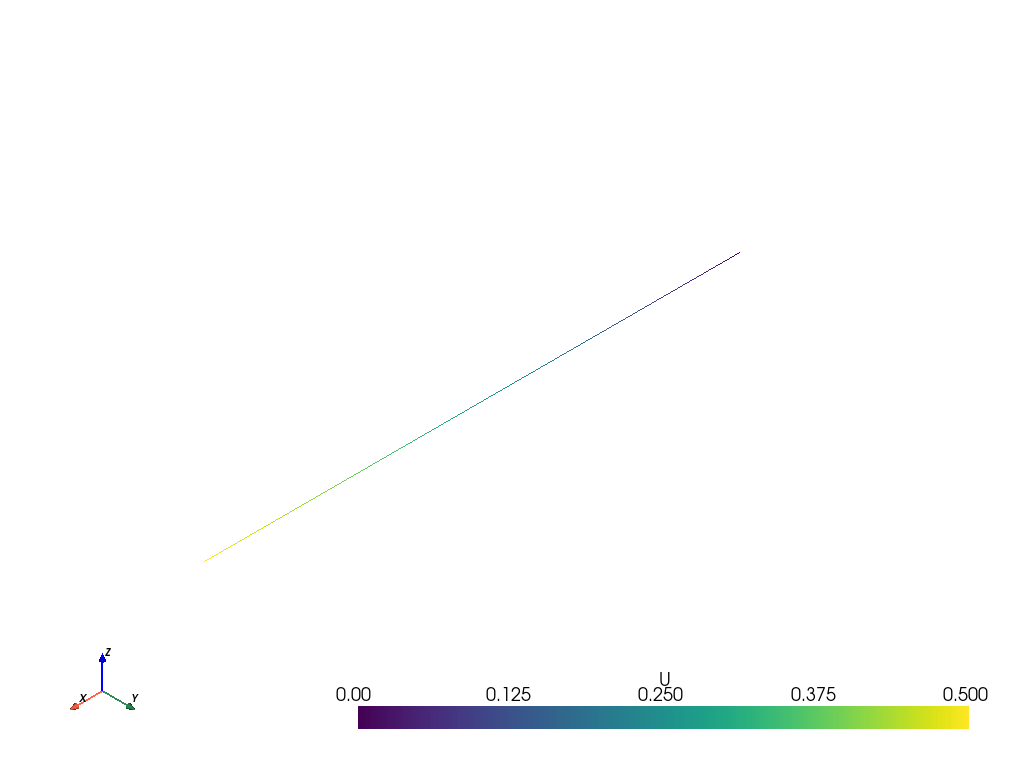

In [23]:
m.plot(jupyter_backend="static")